In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
sns.set()

# 1. Preprocessing

## 1.1 Importing data from csv

In [207]:
#Here the data is imported from the csv file that shares the origin directory, 
#and I use the command head() to check the first 5 rows
raw_data = pd.read_csv('1.04. Real-life example.csv')

raw_data.head()

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,Model
0,BMW,4200.00,sedan,277,2.00,Petrol,yes,1991,320
1,Mercedes-Benz,7900.00,van,427,2.90,Diesel,yes,1999,Sprinter 212
2,Mercedes-Benz,13300.00,sedan,358,5.00,Gas,yes,2003,S 500
3,Audi,23000.00,crossover,240,4.20,Petrol,yes,2007,Q7
4,Toyota,18300.00,crossover,120,2.00,Petrol,yes,2011,Rav 4


In [208]:
# Descriptive statistics are very useful for initial exploration of the variables
# By default, only descriptives for the numerical variables are shown
# In order to include the categorical variables as well I added the include='all' clause
raw_data.describe(include='all')

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,Model
count,4345,4173.00,4345,4345.00,4195.00,4345,4345,4345.00,4345
unique,7,NaN,6,NaN,NaN,4,2,NaN,312
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN,E-Class
freq,936,NaN,1649,NaN,NaN,2019,3947,NaN,199
mean,NaN,19418.75,NaN,161.24,2.79,NaN,NaN,2006.55,NaN
std,NaN,25584.24,NaN,105.71,5.07,NaN,NaN,6.72,NaN
min,NaN,600.00,NaN,0.00,0.60,NaN,NaN,1969.00,NaN
25%,NaN,6999.00,NaN,86.00,1.80,NaN,NaN,2003.00,NaN
50%,NaN,11500.00,NaN,155.00,2.20,NaN,NaN,2008.00,NaN
75%,NaN,21700.00,NaN,230.00,3.00,NaN,NaN,2012.00,NaN


## 1.2 Determining the variables of interest

In [209]:
# In order to procede however, it would be useful to pay extra attention to the 'Models' column.
# It is a categorical variable, which means in order to quatitatively analyse its influence on the target (price)
# we will need to map it into a vector. However, looking at the amount of unique values we run into a problem
models = raw_data['Model'].map(raw_data['Model'].value_counts())
raw_data['Model'].describe()

count        4345
unique        312
top       E-Class
freq          199
Name: Model, dtype: object

In [210]:
# This would, a priori, require a vector that is at least 311 dimensional, which would considerably complicate the process.
# It is natural to think however that the model of the car is a variable with a considerable correlation with other ones (such
# as car body, brand, Engine Volume and type), therefore for the purpouses of this model we'll drop this variable.
data = raw_data.drop(['Model'],axis=1)

In [211]:
# That way, our data becomes
data

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year
0,BMW,4200.00,sedan,277,2.00,Petrol,yes,1991
1,Mercedes-Benz,7900.00,van,427,2.90,Diesel,yes,1999
2,Mercedes-Benz,13300.00,sedan,358,5.00,Gas,yes,2003
3,Audi,23000.00,crossover,240,4.20,Petrol,yes,2007
4,Toyota,18300.00,crossover,120,2.00,Petrol,yes,2011
...,...,...,...,...,...,...,...,...
4340,Mercedes-Benz,125000.00,sedan,9,3.00,Diesel,yes,2014
4341,BMW,6500.00,sedan,1,3.50,Petrol,yes,1999
4342,BMW,8000.00,sedan,194,2.00,Petrol,yes,1985
4343,Toyota,14200.00,sedan,31,NaN,Petrol,yes,2014


## 1.3 Dealing with missing values

In [212]:
# In order to better analyze the data, we need to know the best way to deal with the possible
# missing values in our table. But first, in order to identify them, we'll call the methods
data.isnull()

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year
0,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...
4340,False,False,False,False,False,False,False,False
4341,False,False,False,False,False,False,False,False
4342,False,False,False,False,False,False,False,False
4343,False,False,False,False,True,False,False,False


In [213]:
# and
data.isnull().sum()

Brand             0
Price           172
Body              0
Mileage           0
EngineV         150
Engine Type       0
Registration      0
Year              0
dtype: int64

In [214]:
# Considering that at worst we will lose 322 rows (which is about 7% of the total) we will, for the purpose of this
# exercice, drop the rows containing null values.
data_no_mv = data.dropna(axis=0)

In [215]:
data_no_mv

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year
0,BMW,4200.00,sedan,277,2.00,Petrol,yes,1991
1,Mercedes-Benz,7900.00,van,427,2.90,Diesel,yes,1999
2,Mercedes-Benz,13300.00,sedan,358,5.00,Gas,yes,2003
3,Audi,23000.00,crossover,240,4.20,Petrol,yes,2007
4,Toyota,18300.00,crossover,120,2.00,Petrol,yes,2011
...,...,...,...,...,...,...,...,...
4339,Toyota,17900.00,sedan,35,1.60,Petrol,yes,2014
4340,Mercedes-Benz,125000.00,sedan,9,3.00,Diesel,yes,2014
4341,BMW,6500.00,sedan,1,3.50,Petrol,yes,1999
4342,BMW,8000.00,sedan,194,2.00,Petrol,yes,1985


## 1.4 Plotting the price distribution

<Figure size 2000x1200 with 0 Axes>

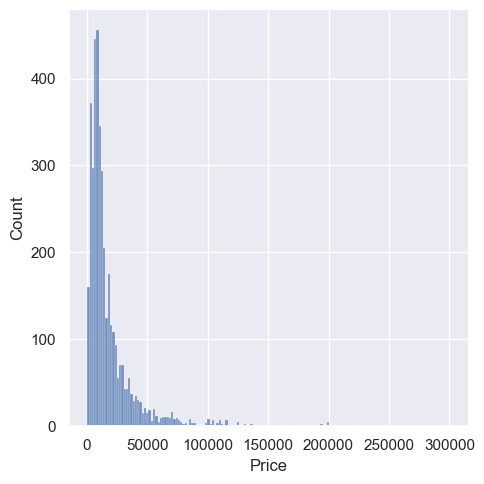

In [216]:
# Now in order to prepare our dataset for the regression it is necessary to check for inconsistencies in the 
# data, specially the numerical variables. Taking price as an example, we've seen in the describe statement that
# the price value has a mean of 19418.75$ while having min and max values of 600 and 300,000 respectively.
# To better understand this absurd variance we'll take a look at the distribution of prices and see that
# only a small percentage of cars crosses the 100,000$ mark.
plt.figure(figsize=(20,12))
sns.displot(data_no_mv['Price'])

## 1.5 Dealing with outliers

In [217]:
# Now that we have defined the outliers in the price distribution our next step is dealing with them.
# For that end we define a cutoff at the 98th percentile.
q = data_no_mv['Price'].quantile(0.98)
data_1 = data_no_mv[data_no_mv['Price']<q]
data_1.describe(include='all')

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year
count,3943,3943.00,3943,3943.00,3943.00,3943,3943,3943.00
unique,7,NaN,6,NaN,NaN,4,2,NaN
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN
freq,880,NaN,1515,NaN,NaN,1818,3572,NaN
mean,NaN,16840.69,NaN,166.74,2.74,NaN,NaN,2006.20
std,NaN,16332.97,NaN,102.04,4.98,NaN,NaN,6.64
min,NaN,600.00,NaN,0.00,0.60,NaN,NaN,1969.00
25%,NaN,6900.00,NaN,95.00,1.80,NaN,NaN,2002.00
50%,NaN,11250.00,NaN,160.00,2.20,NaN,NaN,2007.00
75%,NaN,20800.00,NaN,230.00,3.00,NaN,NaN,2011.00


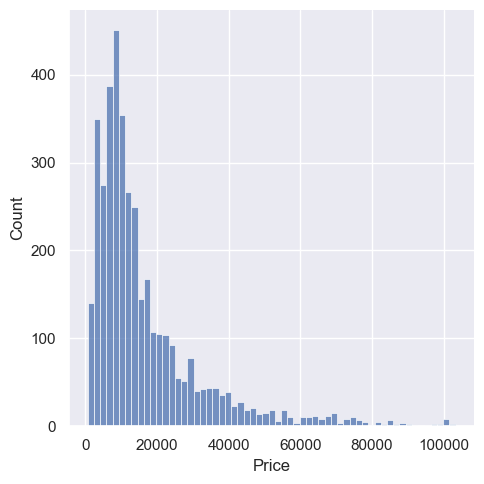

In [218]:
# Plotting now our new price distribution we'll have a much more consistent graph.
sns.displot(data_1['Price'])

In [219]:
data_1.head()

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year
0,BMW,4200.00,sedan,277,2.00,Petrol,yes,1991
1,Mercedes-Benz,7900.00,van,427,2.90,Diesel,yes,1999
2,Mercedes-Benz,13300.00,sedan,358,5.00,Gas,yes,2003
3,Audi,23000.00,crossover,240,4.20,Petrol,yes,2007
4,Toyota,18300.00,crossover,120,2.00,Petrol,yes,2011


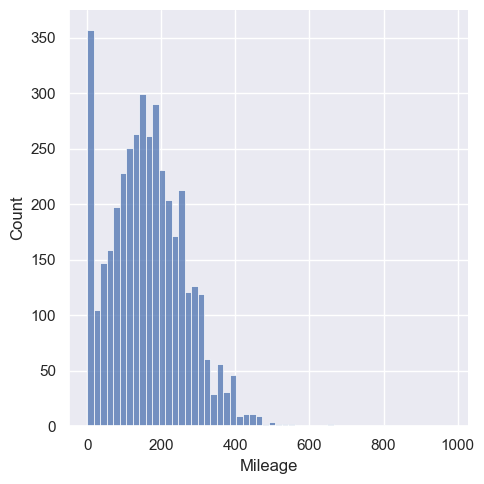

In [220]:
# Next, we'll go through the same procedure with the other numerical variables, Mileage, Engine Volume and
# Fabrication year.
sns.displot(data_no_mv['Mileage'])

In [221]:
q_2 = data_1['Mileage'].quantile(0.98)
data_2 = data_1[data_1['Mileage']<q_2]
data_2.describe(include='all')

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year
count,3855,3855.00,3855,3855.00,3855.00,3855,3855,3855.00
unique,7,NaN,6,NaN,NaN,4,2,NaN
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN
freq,859,NaN,1474,NaN,NaN,1765,3493,NaN
mean,NaN,17078.95,NaN,160.04,2.75,NaN,NaN,2006.44
std,NaN,16389.63,NaN,91.79,5.04,NaN,NaN,6.45
min,NaN,600.00,NaN,0.00,0.60,NaN,NaN,1969.00
25%,NaN,7000.00,NaN,94.00,1.80,NaN,NaN,2003.00
50%,NaN,11500.00,NaN,158.00,2.20,NaN,NaN,2007.00
75%,NaN,21000.00,NaN,225.00,3.00,NaN,NaN,2011.00


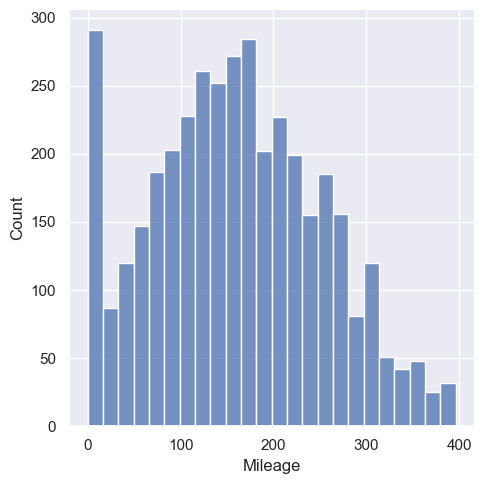

In [222]:
sns.displot(data_2['Mileage'])

In [223]:
# Regarding the engine volume variable a quick google search reveals that the maximum value
# for this variable is around 6.5 which is much below certain values in our dataset, in fact if
# we create a new dataset for the engine volume and apply the tail command we'll se that several
# entrances have 99.99 which is an old way to represent missing values.
EngV = pd.DataFrame(data_2['EngineV'])
EngV.sort_values(by='EngineV').tail()

,EngineV
2349,99.99
930,99.99
1311,99.99
3641,99.99
1264,99.99


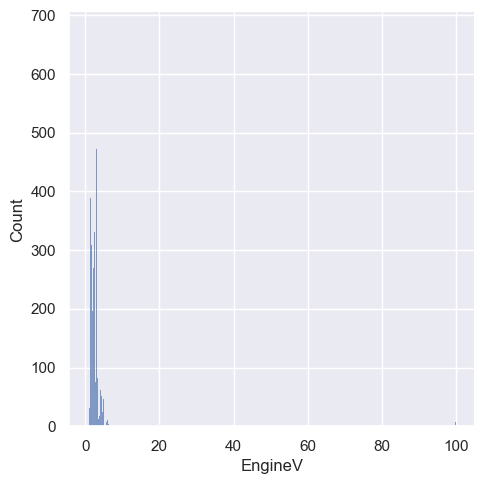

In [224]:
#Plotting the distribution we have
sns.displot(data_2['EngineV'])

In [225]:
# Now, establishing the value 6.5 as the upper limit we have a much more consistent distribution
data_3 = data_2[data_2['EngineV']<6.5]
data_3.describe(include='all')

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year
count,3832,3832.00,3832,3832.00,3832.00,3832,3832,3832.00
unique,7,NaN,6,NaN,NaN,4,2,NaN
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN
freq,854,NaN,1462,NaN,NaN,1758,3476,NaN
mean,NaN,17129.63,NaN,159.82,2.44,NaN,NaN,2006.46
std,NaN,16415.16,NaN,91.81,0.95,NaN,NaN,6.45
min,NaN,600.00,NaN,0.00,0.60,NaN,NaN,1969.00
25%,NaN,7137.50,NaN,93.75,1.80,NaN,NaN,2003.00
50%,NaN,11500.00,NaN,157.00,2.20,NaN,NaN,2008.00
75%,NaN,21000.00,NaN,225.00,3.00,NaN,NaN,2011.00


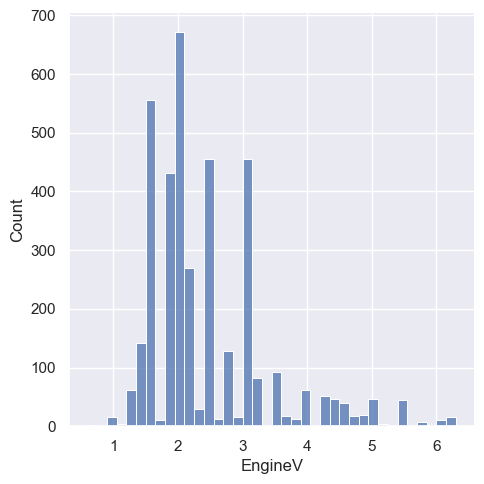

In [226]:
sns.displot(data_3['EngineV'])

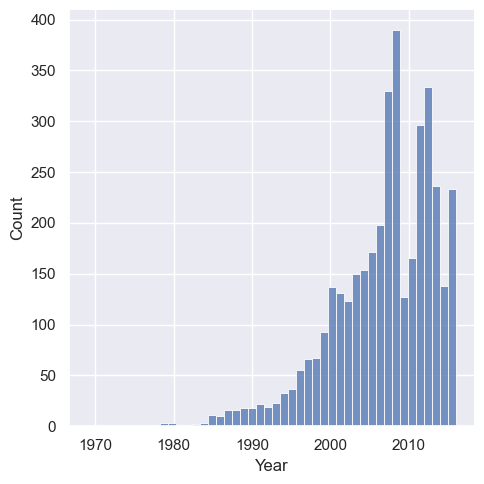

In [227]:
# For the Year variable we'll go through the same process already established before
sns.displot(data_3['Year'])

In [228]:
q_4 = data_3['Year'].quantile(0.01)
data_4 = data_3[data_3['Year']>q_4]
data_4.describe(include='all')

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year
count,3781,3781.00,3781,3781.00,3781.00,3781,3781,3781.00
unique,7,NaN,6,NaN,NaN,4,2,NaN
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN
freq,841,NaN,1432,NaN,NaN,1749,3425,NaN
mean,NaN,17316.69,NaN,159.24,2.44,NaN,NaN,2006.75
std,NaN,16436.57,NaN,91.48,0.95,NaN,NaN,5.96
min,NaN,800.00,NaN,0.00,0.60,NaN,NaN,1988.00
25%,NaN,7300.00,NaN,93.00,1.80,NaN,NaN,2003.00
50%,NaN,11700.00,NaN,157.00,2.20,NaN,NaN,2008.00
75%,NaN,21300.00,NaN,223.00,3.00,NaN,NaN,2011.00


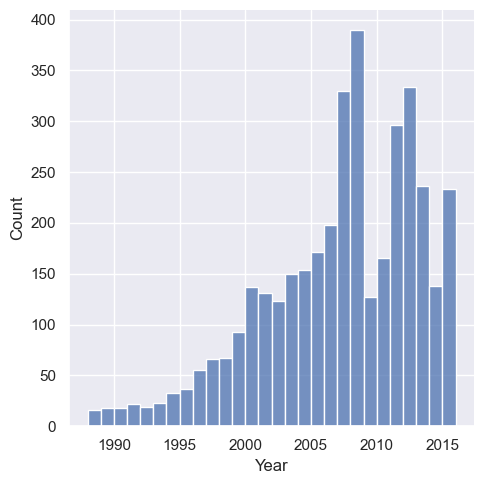

In [229]:
sns.displot(data_4['Year'])

In [230]:
# Now that both the outliers and the null values have been eliminated, we see that there's a mismatch between the row indices and the rows, due to
# the values that were suppressed.
data_4

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year
0,BMW,4200.00,sedan,277,2.00,Petrol,yes,1991
2,Mercedes-Benz,13300.00,sedan,358,5.00,Gas,yes,2003
3,Audi,23000.00,crossover,240,4.20,Petrol,yes,2007
4,Toyota,18300.00,crossover,120,2.00,Petrol,yes,2011
7,Audi,14200.00,vagon,200,2.70,Diesel,yes,2006
...,...,...,...,...,...,...,...,...
4337,Renault,6800.00,sedan,152,1.60,Petrol,yes,2007
4338,Volkswagen,11500.00,van,163,2.50,Diesel,yes,2008
4339,Toyota,17900.00,sedan,35,1.60,Petrol,yes,2014
4341,BMW,6500.00,sedan,1,3.50,Petrol,yes,1999


In [231]:
# To fix that we'll reset the indices of the rows
data_cleaned = data_4.reset_index(drop=True)
data_cleaned

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year
0,BMW,4200.00,sedan,277,2.00,Petrol,yes,1991
1,Mercedes-Benz,13300.00,sedan,358,5.00,Gas,yes,2003
2,Audi,23000.00,crossover,240,4.20,Petrol,yes,2007
3,Toyota,18300.00,crossover,120,2.00,Petrol,yes,2011
4,Audi,14200.00,vagon,200,2.70,Diesel,yes,2006
...,...,...,...,...,...,...,...,...
3776,Renault,6800.00,sedan,152,1.60,Petrol,yes,2007
3777,Volkswagen,11500.00,van,163,2.50,Diesel,yes,2008
3778,Toyota,17900.00,sedan,35,1.60,Petrol,yes,2014
3779,BMW,6500.00,sedan,1,3.50,Petrol,yes,1999


In [232]:
# And finally, we have our cleaned dataset
data_cleaned.describe(include='all')

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year
count,3781,3781.00,3781,3781.00,3781.00,3781,3781,3781.00
unique,7,NaN,6,NaN,NaN,4,2,NaN
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN
freq,841,NaN,1432,NaN,NaN,1749,3425,NaN
mean,NaN,17316.69,NaN,159.24,2.44,NaN,NaN,2006.75
std,NaN,16436.57,NaN,91.48,0.95,NaN,NaN,5.96
min,NaN,800.00,NaN,0.00,0.60,NaN,NaN,1988.00
25%,NaN,7300.00,NaN,93.00,1.80,NaN,NaN,2003.00
50%,NaN,11700.00,NaN,157.00,2.20,NaN,NaN,2008.00
75%,NaN,21300.00,NaN,223.00,3.00,NaN,NaN,2011.00


# 2. Checking OLS assumptions

## 2.1 Linearity and possibly necessary transformations

Text(0.5, 1.0, 'Price vs Engine Volume')

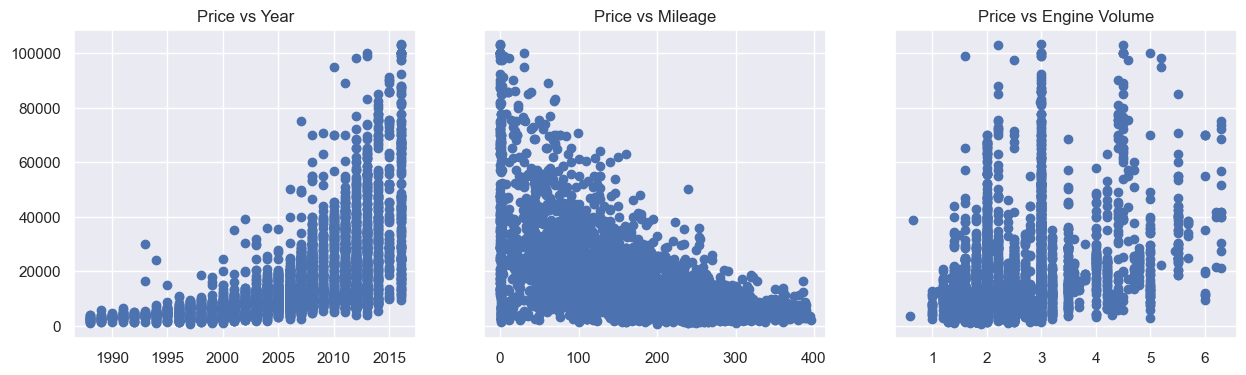

In [233]:
# The next step before executing the regression is to check if the distribution of the obtained data does follow the conditions necessary
# for it to be analized via a linear regression. First of all, let's plot all 3 graphs of the target (price) vs all numerical variables.

f, (pl1, pl2, pl3) = plt.subplots(1, 3, sharey=True, figsize =(15,4))

pl1.scatter(data_cleaned['Year'], data_cleaned['Price'])
pl1.set_title('Price vs Year')
pl2.scatter(data_cleaned['Mileage'], data_cleaned['Price'])
pl2.set_title('Price vs Mileage')
pl3.scatter(data_cleaned['EngineV'], data_cleaned['Price'])
pl3.set_title('Price vs Engine Volume')

In [234]:
# Judging only from the shape of the distributions obtained, it can be seen that the data doesn't directly obeys the condition of linearity, and possibly homoscedasticity.
# therefore it would be useful to apply a log transformation on the price variable and see the results.
log_price = np.log(data_cleaned['Price'])
data_cleaned['Log price'] = log_price
data_cleaned

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,Log price
0,BMW,4200.00,sedan,277,2.00,Petrol,yes,1991,8.34
1,Mercedes-Benz,13300.00,sedan,358,5.00,Gas,yes,2003,9.50
2,Audi,23000.00,crossover,240,4.20,Petrol,yes,2007,10.04
3,Toyota,18300.00,crossover,120,2.00,Petrol,yes,2011,9.81
4,Audi,14200.00,vagon,200,2.70,Diesel,yes,2006,9.56
...,...,...,...,...,...,...,...,...,...
3776,Renault,6800.00,sedan,152,1.60,Petrol,yes,2007,8.82
3777,Volkswagen,11500.00,van,163,2.50,Diesel,yes,2008,9.35
3778,Toyota,17900.00,sedan,35,1.60,Petrol,yes,2014,9.79
3779,BMW,6500.00,sedan,1,3.50,Petrol,yes,1999,8.78


Text(0.5, 1.0, 'Log Price vs Engine Volume')

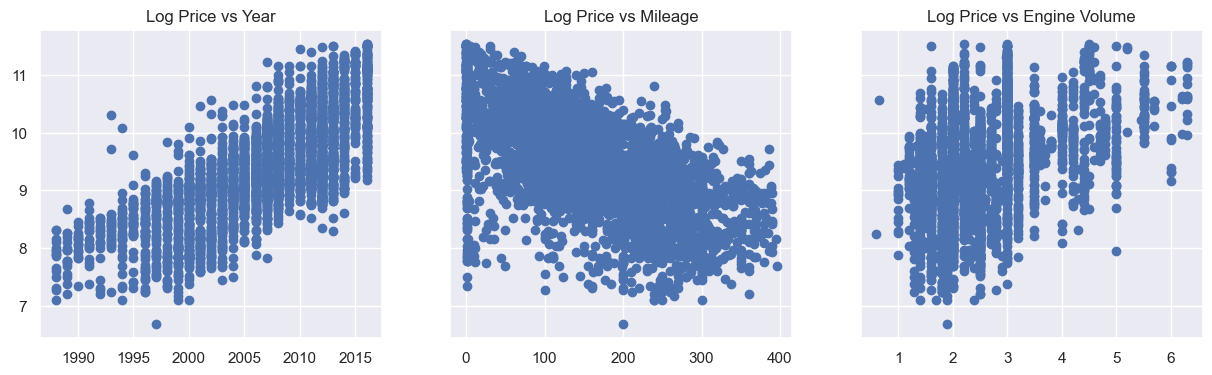

In [235]:
# As a result, we can see that the distributions, as well as the data dispersion/error, are notably more linear-like now,
f, (plo1, plo2, plo3) = plt.subplots(1, 3, sharey=True, figsize =(15,4))

plo1.scatter(data_cleaned['Year'], data_cleaned['Log price'])
plo1.set_title('Log Price vs Year')
plo2.scatter(data_cleaned['Mileage'], data_cleaned['Log price'])
plo2.set_title('Log Price vs Mileage')
plo3.scatter(data_cleaned['EngineV'], data_cleaned['Log price'])
plo3.set_title('Log Price vs Engine Volume')

### Dropping the price variable and using log price as target

In [236]:
# Now, since it is redundant to have both the price and its logarithm on the table, we drop it
data_cleaned = data_cleaned.drop(['Price'],axis=1)

In [237]:
data_cleaned

,Brand,Body,Mileage,EngineV,Engine Type,Registration,Year,Log price
0,BMW,sedan,277,2.00,Petrol,yes,1991,8.34
1,Mercedes-Benz,sedan,358,5.00,Gas,yes,2003,9.50
2,Audi,crossover,240,4.20,Petrol,yes,2007,10.04
3,Toyota,crossover,120,2.00,Petrol,yes,2011,9.81
4,Audi,vagon,200,2.70,Diesel,yes,2006,9.56
...,...,...,...,...,...,...,...,...
3776,Renault,sedan,152,1.60,Petrol,yes,2007,8.82
3777,Volkswagen,van,163,2.50,Diesel,yes,2008,9.35
3778,Toyota,sedan,35,1.60,Petrol,yes,2014,9.79
3779,BMW,sedan,1,3.50,Petrol,yes,1999,8.78


In [238]:
# AS mentioned before, with this log transformation we solve both the problem of linearity and
# that of heteroscedasticity, considering that the errors now fall in the same scale independent of 
# the target's size.
# Regarding now the other assumptions we have that 1st: Normality is assumed for the sample size following the CLT. 
# 2nd: The zero mean of the error distribution is accomplished through the inclusion of the intercept in the regression
# 3rd: Since the observations do not come from a time series or panel data but are merely a snapshot of data from
# independet sources, we can assume there's no autocorrelation.
# The endogeneity assumption will be dealt with after the regression is made, which leaves us with the no multicolinearity
# condition. To test this we'll use a heatmap of the correlation matrix.

In [239]:
# First of all, let's reorganize the columns in our dataset and put our target first
cols = ['Log price'] + [col for col in data_cleaned.columns if col != 'Log price']
data_cleaned = data_cleaned[cols]
data_cleaned

,Log price,Brand,Body,Mileage,EngineV,Engine Type,Registration,Year
0,8.34,BMW,sedan,277,2.00,Petrol,yes,1991
1,9.50,Mercedes-Benz,sedan,358,5.00,Gas,yes,2003
2,10.04,Audi,crossover,240,4.20,Petrol,yes,2007
3,9.81,Toyota,crossover,120,2.00,Petrol,yes,2011
4,9.56,Audi,vagon,200,2.70,Diesel,yes,2006
...,...,...,...,...,...,...,...,...
3776,8.82,Renault,sedan,152,1.60,Petrol,yes,2007
3777,9.35,Volkswagen,van,163,2.50,Diesel,yes,2008
3778,9.79,Toyota,sedan,35,1.60,Petrol,yes,2014
3779,8.78,BMW,sedan,1,3.50,Petrol,yes,1999


In [240]:
# Now we can proceed in two ways, adding dummy variables and analyze the total correlation matrix or analyze it only for the numerical variables
# I've opted for the first option
data_dummies = pd.get_dummies(data_cleaned,drop_first=True)
data_dummies

,Log price,Mileage,EngineV,Year,Brand_BMW,Brand_Mercedes-Benz,Brand_Mitsubishi,Brand_Renault,Brand_Toyota,Brand_Volkswagen,Body_hatch,Body_other,Body_sedan,Body_vagon,Body_van,Engine Type_Gas,Engine Type_Other,Engine Type_Petrol,Registration_yes
0,8.34,277,2.00,1991,True,False,False,False,False,False,False,False,True,False,False,False,False,True,True
1,9.50,358,5.00,2003,False,True,False,False,False,False,False,False,True,False,False,True,False,False,True
2,10.04,240,4.20,2007,False,False,False,False,False,False,False,False,False,False,False,False,False,True,True
3,9.81,120,2.00,2011,False,False,False,False,True,False,False,False,False,False,False,False,False,True,True
4,9.56,200,2.70,2006,False,False,False,False,False,False,False,False,False,True,False,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3776,8.82,152,1.60,2007,False,False,False,True,False,False,False,False,True,False,False,False,False,True,True
3777,9.35,163,2.50,2008,False,False,False,False,False,True,False,False,False,False,True,False,False,False,True
3778,9.79,35,1.60,2014,False,False,False,False,True,False,False,False,True,False,False,False,False,True,True
3779,8.78,1,3.50,1999,True,False,False,False,False,False,False,False,True,False,False,False,False,True,True


In [241]:
data_dummies.columns.values

array(['Log price', 'Mileage', 'EngineV', 'Year', 'Brand_BMW',
       'Brand_Mercedes-Benz', 'Brand_Mitsubishi', 'Brand_Renault',
       'Brand_Toyota', 'Brand_Volkswagen', 'Body_hatch', 'Body_other',
       'Body_sedan', 'Body_vagon', 'Body_van', 'Engine Type_Gas',
       'Engine Type_Other', 'Engine Type_Petrol', 'Registration_yes'],
      dtype=object)

<Axes: >

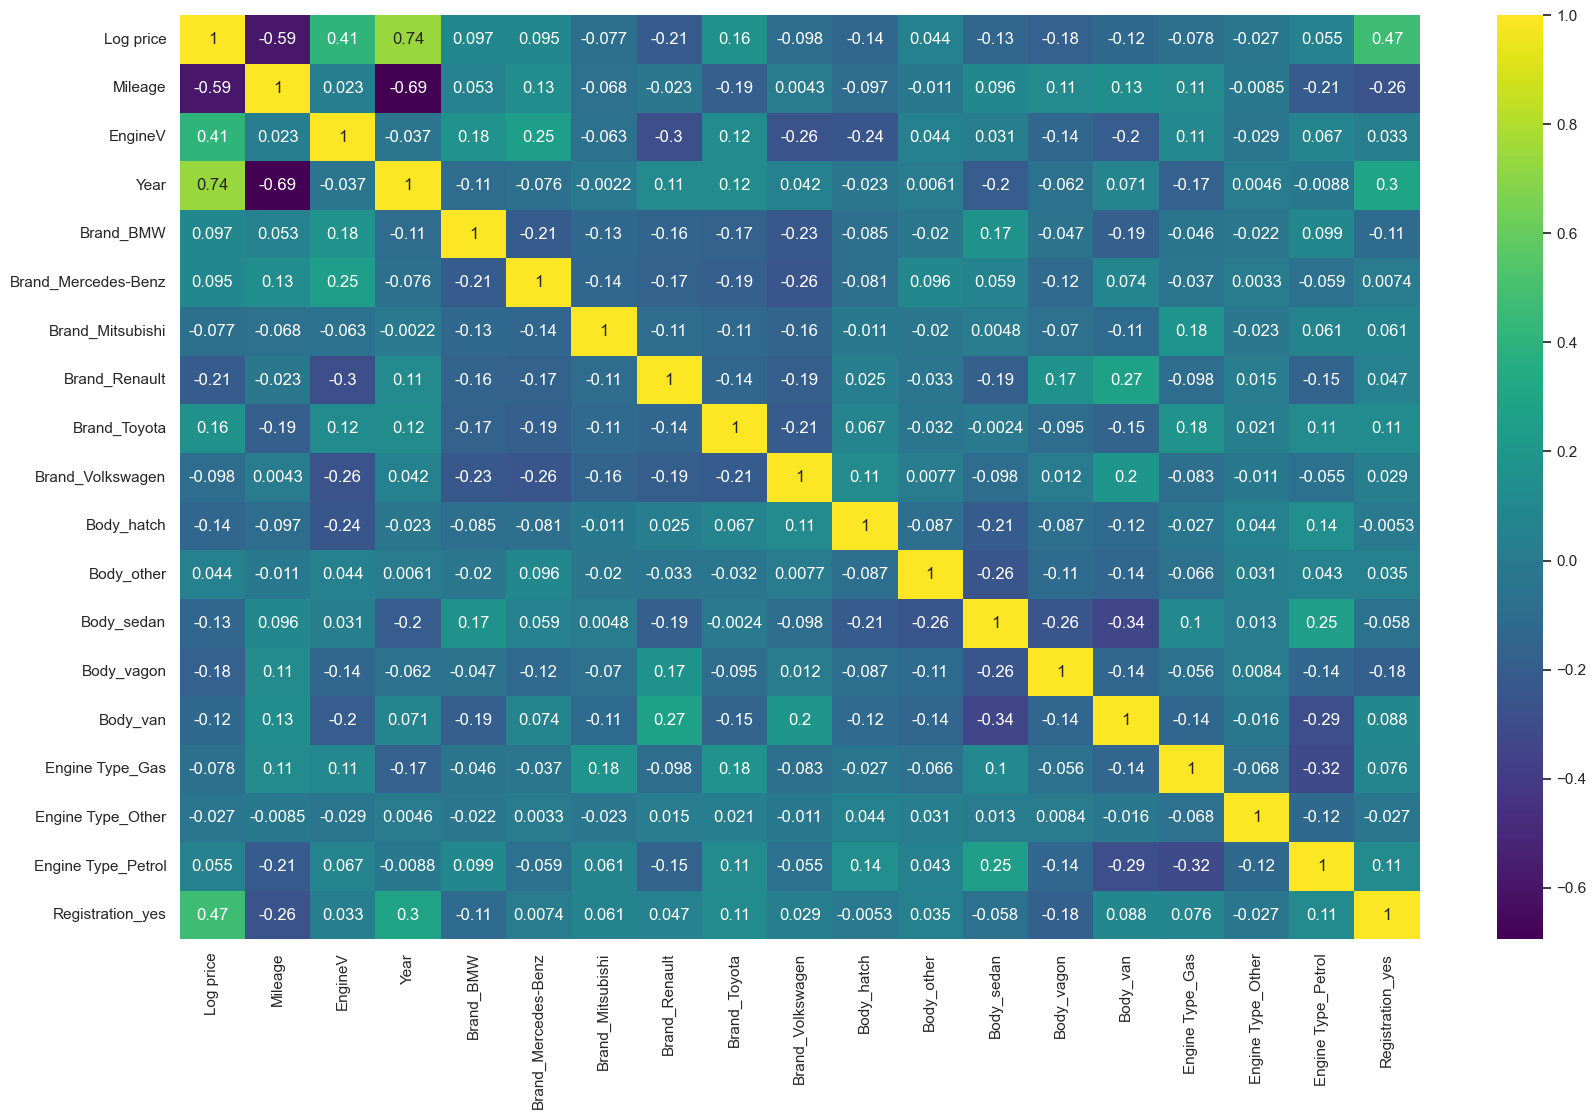

In [242]:
# With this, we can plot our heatmap of correlations
plt.figure(figsize=(20, 12))
sns.heatmap(data_dummies.corr(),cmap='viridis',annot=True)

<Axes: >

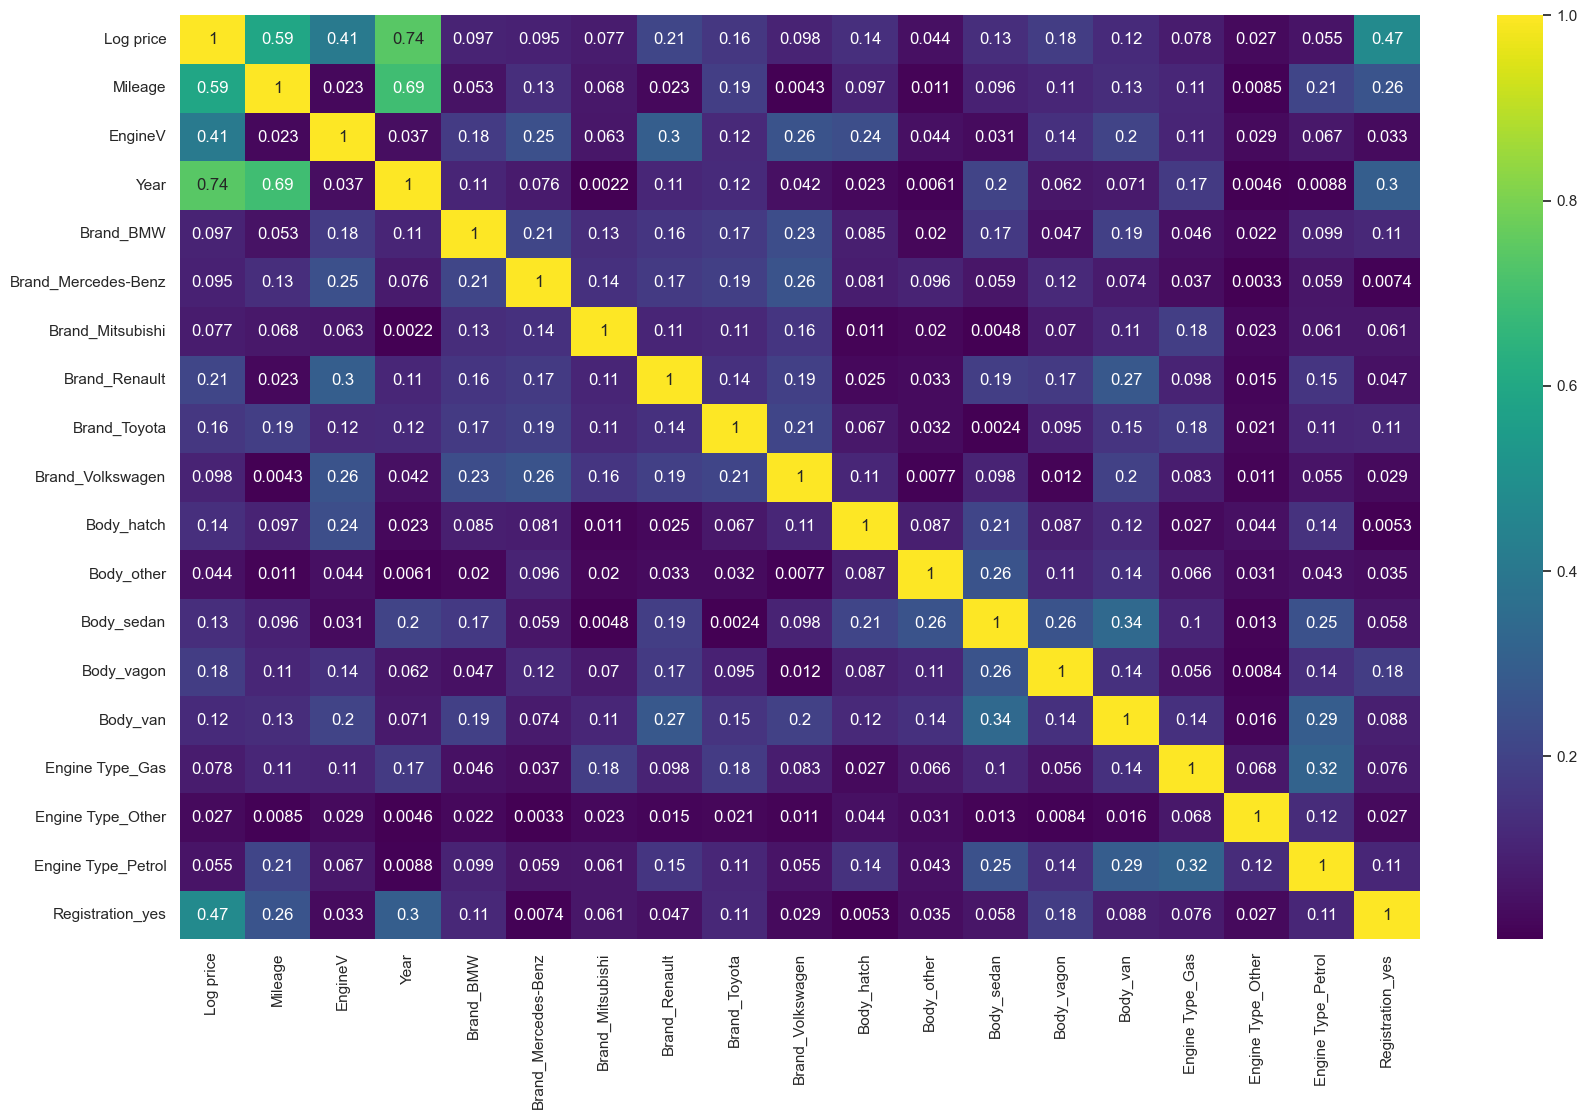

In [243]:
# This heatmap however can be quite confusing due to the fact that numbers closer to 0 have a hue that's in the middle
# of the scale. In order to clarify the dependences, with the consequence of losing the nature of the correlations (positive
# or negative) I will use a second heatmap of only the absolute values.
plt.figure(figsize=(20, 12))
sns.heatmap(abs(data_dummies.corr()),cmap='viridis',annot=True)

In [244]:
# With these heatmaps we can see that in general there's no strong correlation (above 0.4) between most the inputs (in fact there's no strong correlation between
# the target and most of the inputs either, with the exception of our numerical variables and the registration bin). However, we can can observe a very
# strong correlation between Mileage and Year, which is to be expected.

In [245]:
# AS a consequence of this interdependence between these two variables it is necessary (or at least strongly recommended) to drop one,
# analyzing both graphs of the price vs each one of these, I've decided to exclude the mileage variable due to the greater clarity and
# uniformity of the Price vs Year graph. Later we can compare the results of a regression where the year is removed.
data_prep = data_dummies.drop(['Mileage'],axis=1)
data_prep

,Log price,EngineV,Year,Brand_BMW,Brand_Mercedes-Benz,Brand_Mitsubishi,Brand_Renault,Brand_Toyota,Brand_Volkswagen,Body_hatch,Body_other,Body_sedan,Body_vagon,Body_van,Engine Type_Gas,Engine Type_Other,Engine Type_Petrol,Registration_yes
0,8.34,2.00,1991,True,False,False,False,False,False,False,False,True,False,False,False,False,True,True
1,9.50,5.00,2003,False,True,False,False,False,False,False,False,True,False,False,True,False,False,True
2,10.04,4.20,2007,False,False,False,False,False,False,False,False,False,False,False,False,False,True,True
3,9.81,2.00,2011,False,False,False,False,True,False,False,False,False,False,False,False,False,True,True
4,9.56,2.70,2006,False,False,False,False,False,False,False,False,False,True,False,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3776,8.82,1.60,2007,False,False,False,True,False,False,False,False,True,False,False,False,False,True,True
3777,9.35,2.50,2008,False,False,False,False,False,True,False,False,False,False,True,False,False,False,True
3778,9.79,1.60,2014,False,False,False,False,True,False,False,False,True,False,False,False,False,True,True
3779,8.78,3.50,1999,True,False,False,False,False,False,False,False,True,False,False,False,False,True,True


# 2. Implementing the model

## 2.1 Defining target and predictors and scaling them

In [270]:
# We are now ready to initiate our regression. 
# First however, it is higly recommended to scale the numerical inputs to obtain clearer results.
# To do so, first we define the input and target data frames.

# The target(s) (dependent variable) is 'log price'

target = data_prep['Log price']

# The inputs are everything BUT the dependent variable, so we can simply drop it

inputs = data_prep.drop(['Log price'],axis=1)

In [271]:
# We need now to import the scaling module
from sklearn.preprocessing import StandardScaler

# Create a scaler object 
scaler = StandardScaler()

# and separate the dummy variables from the numerical inputs
dums = inputs[['Brand_BMW',
       'Brand_Mercedes-Benz', 'Brand_Mitsubishi', 'Brand_Renault',
       'Brand_Toyota', 'Brand_Volkswagen', 'Body_hatch', 'Body_other',
       'Body_sedan', 'Body_vagon', 'Body_van', 'Engine Type_Gas',
       'Engine Type_Other', 'Engine Type_Petrol', 'Registration_yes']]
inputs_no_dum = inputs.drop(dums,axis=1)

# We now fit the inputs
scaler.fit(inputs_no_dum)

StandardScaler()

In [248]:
# After that, we obtain a numpy array of scaled data. In order to join the dummy variables once again it is necessary to
# transform them into a numpy array as well.
inputs_scaling = scaler.transform(inputs_no_dum)
dums = dums.astype(int)
dumsnp = dums.to_numpy()
inputs_scaled = np.hstack((inputs_scaling,dumsnp))
inputs_scaled

array([[-0.46495967, -2.64539121,  1.        , ...,  0.        ,
         1.        ,  1.        ],
       [ 2.68853912, -0.63006656,  0.        , ...,  0.        ,
         0.        ,  1.        ],
       [ 1.84760611,  0.04170832,  0.        , ...,  0.        ,
         1.        ,  1.        ],
       ...,
       [-0.88542617,  1.21731436,  0.        , ...,  0.        ,
         1.        ,  1.        ],
       [ 1.11178972, -1.30184145,  1.        , ...,  0.        ,
         1.        ,  1.        ],
       [-0.46495967,  1.04937064,  0.        , ...,  0.        ,
         0.        ,  1.        ]])

## 2.2 Training the model

In [249]:
# With our scaled data, we're finnaly in position to train our model, as well as test it.
# From sklearn we import the method train_test_split and separate the data into a 80%/20% train/test split,
# after which, we fit our regression to the training data.
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(inputs_scaled, target, test_size=0.2, random_state=42)

In [250]:
# Now we create the linear regression object as well as fit it  with the scaled TRAIN inputs and targets
reg = LinearRegression()
reg.fit(x_train,y_train)

LinearRegression()

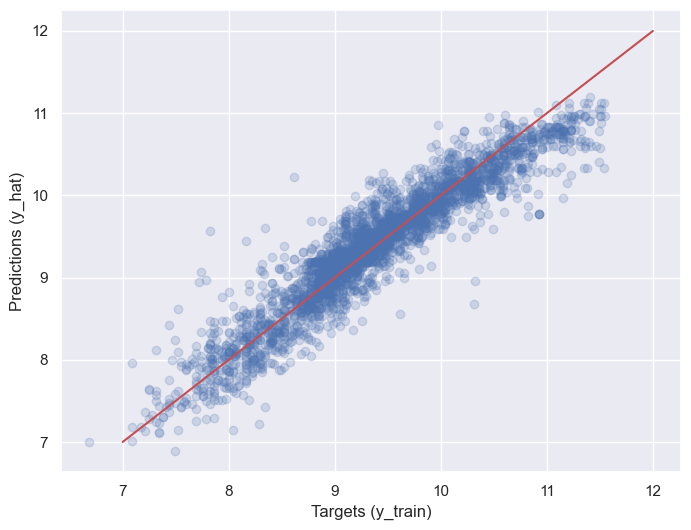

In [251]:
# We now check the outputs of the regression
# I'll store them in y_hat as this is the 'theoretical' name of the predictions
y_hat = reg.predict(x_train)

# The simplest way to compare the targets (y_train) and the predictions (y_hat) is to plot them on a scatter plot
# The closer the points are to the 45-degree line, the better the prediction
plt.figure(figsize=(8, 6))
plt.scatter(y_train,y_hat, alpha=0.2)
plt.xlabel('Targets (y_train)')
plt.ylabel('Predictions (y_hat)')
plt.plot([7,12],[7,12], color='r')

Text(0.5, 1.0, 'Residuals (%)')

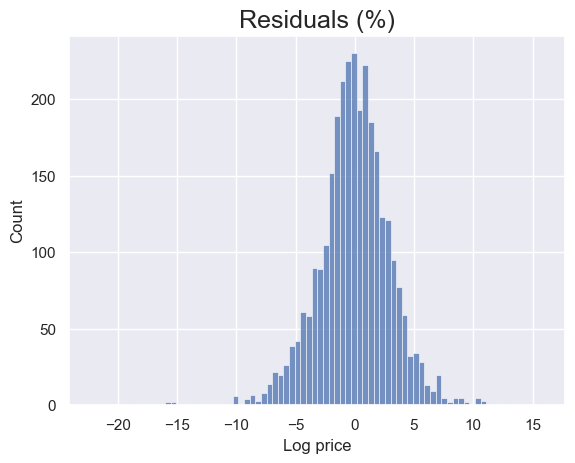

In [252]:
# Another useful check of our model is a residual plot
# We can plot the PDF of the residuals and check for anomalies
sns.histplot((y_train - y_hat)/y_train*100)

# Include a title
plt.title("Residuals (%)", size=18)

# In the best case scenario this plot should be normally distributed
# In our case we notice that there are many negative residuals (far away from the mean)
# Given the definition of the residuals (y_train - y_hat), negative values imply
# that y_hat (predictions) are higher than y_train (the targets)

In [253]:
# Calculating the R-squared gives us
R2 = reg.score(x_train,y_train)
R2
#The R-squared adjusted is given by the formula below

0.8828160582815111

## $R^2_{adj} = 1-\frac{(1-R^2)(n-1)}{n-k-1}$

In [254]:
# With n being the number of data points, k being the number of features and R^2 the R-squared
# The values k and n are given by the number of columns and 80% of the rows in data_prep respectively
k = data_prep.shape[1]
n = y_train.shape[0]
R2_adj = 1 - (1-R2)*(n-1)/(n-k-1)
R2_adj

0.8821141245208013

In [255]:
# Which is a relatively high value for the adjusted R-squared considering how messy the data was in the beginning

In [256]:
# THe intercept is given by
reg.intercept_

9.122602813063333

In [257]:
# Now, we obtain the weights (coefficients) of the regression
reg.coef_

array([ 0.21616322,  0.56209107,  0.0635564 , -0.02428524, -0.46993424,
       -0.63319516, -0.21577567, -0.25368273, -0.35547118, -0.23897255,
       -0.3034573 , -0.35728288, -0.45117927, -0.10852483, -0.08090764,
       -0.09115075,  0.87220451])

In [258]:
# And create a dataframe with them
# From this we can easily see that the fabrication year is the most relevant variable in this regression,
# Having the greatest influence over the target. At the same time, we can see the importance of the dummy
# Variables in relation to the base dummies, which are AUDI for the BRAND, CROSSOVER for the BODY and DIESEL
# For the engine type. We see that all coeficients of the dummies are negative, therefore these base categories 
# Are the ones with the HIGHEST AVERAGE PRICED VEHICLES.
reg_summary = pd.DataFrame(inputs.columns.values, columns=['Features'])
reg_summary['Weights'] = reg.coef_
reg_summary

,Features,Weights
0,EngineV,0.22
1,Year,0.56
2,Brand_BMW,0.06
3,Brand_Mercedes-Benz,-0.02
4,Brand_Mitsubishi,-0.47
5,Brand_Renault,-0.63
6,Brand_Toyota,-0.22
7,Brand_Volkswagen,-0.25
8,Body_hatch,-0.36
9,Body_other,-0.24


## 2.3 Testing the model

In [259]:
# Now, dealing with the test data set to avoid possible overfitting (which is unlikely the case since this is a
# Mere linear regression, but for the purpouses of this project is necessary), we use our model on the x_test data
# To calculate the corresponding y values and use a scatter plot to compare the predicted with the real values
y_hat_test = reg.predict(x_test)

Text(0.5, 0, 'Target Price (log)')

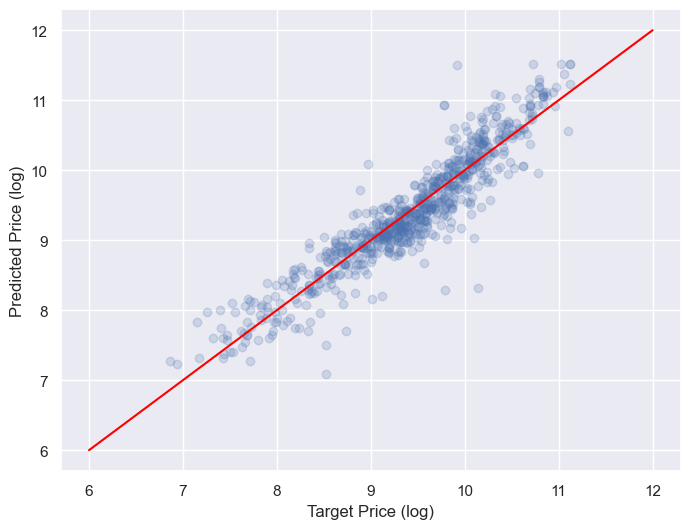

In [260]:
# Applying a transparency of 0.2  to the markers we can see that most points concentrate around the 45 degree line
# Demonstrating again the resonable accuracy of our model, specially for higher values
plt.figure(figsize=(8, 6))
plt.scatter(y_hat_test,y_test, alpha=0.2)
plt.plot([6, 12], [6, 12], color='red')
plt.ylabel("Predicted Price (log)")
plt.xlabel("Target Price (log)")

In [261]:
# Finally, let's manually check these predictions
# To obtain the actual prices, we take the exponential of the log_price
df_pf = pd.DataFrame(np.exp(y_hat_test), columns=['Prediction'])
df_pf.head()

,Prediction
0,13731.78
1,13731.78
2,13418.77
3,2053.17
4,14300.39


In [269]:
# We can also include the test targets in that data frame (so we can manually compare them)
df_pf['Target'] = np.exp(y_test)
df_pf.head()

# Note that we have a lot of missing values
# There is no reason to have ANY missing values, though
# This suggests that something is wrong with the data frame / indexing

,Prediction,Target,Residual,Difference%
0,13731.78,10800.00,-2931.78,27.15
1,13731.78,13500.00,-231.78,1.72
2,13418.77,9500.00,-3918.77,41.25
3,2053.17,1750.00,-303.17,17.32
4,14300.39,12900.00,-1400.39,10.86


In [263]:
# After displaying y_test, we find what the issue is
# The old indexes are preserved.
# Therefore, to get a proper result, we must reset the index and drop the old indexing
y_test = y_test.reset_index(drop=True)
df_pf['Target'] = np.exp(y_test)
df_pf.head()

,Prediction,Target
0,13731.78,10800.00
1,13731.78,13500.00
2,13418.77,9500.00
3,2053.17,1750.00
4,14300.39,12900.00


In [268]:
# Additionally, we can calculate the difference between the targets and the predictions
# Note that this is actually the residual (we already plotted the residuals)
df_pf['Residual'] = df_pf['Target'] - df_pf['Prediction']
# Finally, it makes sense to see how far off we are from the result percentage-wise
# Here, we take the absolute difference in %, so we can easily order the data frame
df_pf['Difference%'] = np.absolute(df_pf['Residual']/df_pf['Target']*100)
df_pf.head()

,Prediction,Target,Residual,Difference%
0,13731.78,10800.00,-2931.78,27.15
1,13731.78,13500.00,-231.78,1.72
2,13418.77,9500.00,-3918.77,41.25
3,2053.17,1750.00,-303.17,17.32
4,14300.39,12900.00,-1400.39,10.86


In [265]:
# Exploring the descriptives here gives us additional insights
df_pf.describe()

,Prediction,Target,Residual,Difference%
count,757.00,757.00,757.00,757.00
mean,15945.12,17028.28,1083.16,24.45
std,11837.09,15996.90,7601.41,33.27
min,959.51,1200.00,-27339.03,0.05
25%,7697.15,7450.00,-1839.27,7.81
50%,13008.51,11500.00,17.73,17.21
75%,21156.92,21000.00,1811.61,30.85
max,67482.53,100000.00,78711.93,519.91


In [278]:
# Sometimes it is useful to check these outputs manually
# To see all rows, we use the relevant pandas syntax
pd.options.display.max_rows = 999
# Moreover, to make the dataset clear, we can display the result with only 2 digits after the dot 
pd.set_option('display.float_format', lambda x: '%.2f' % x)
# Finally, we sort by difference in % and manually check the model
df_pf.sort_values(by=['Difference%']).reset_index(drop=True)

,Prediction,Target,Residual,Difference%
0,12293.78,12300.00,6.22,0.05
1,18082.27,18100.00,17.73,0.10
2,24473.19,24500.00,26.81,0.11
3,13731.78,13700.00,-31.78,0.23
4,2907.76,2899.00,-8.76,0.30
5,24817.68,24900.00,82.32,0.33
6,7669.61,7700.00,30.39,0.39
7,14278.47,14200.00,-78.47,0.55
8,26701.53,26850.00,148.47,0.55
9,7258.59,7299.00,40.41,0.55
